In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata.csv' #zainab's
file_path1='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata_test.csv' #zainab's
file_path2='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata_kaggle.csv' #zainab's
#file_path='/content/drive/My Drive/Course Dataset/metadata.csv' #kirti's
#file_path1='/content/drive/My Drive/Course Dataset/metadata_test.csv' #kirti's
#file_path2='/content/drive/My Drive/Course Dataset/metadata_kaggle.csv' #kirti's
df_metadata=pd.read_csv(file_path)
df_metadata_test=pd.read_csv(file_path1)
df_metadata_kaggle=pd.read_csv(file_path2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Merge df_metadata and df_metadata_test
merged_df = pd.concat([df_metadata, df_metadata_test], ignore_index=True)


In [5]:
# Display the merged DataFrame
print(merged_df.head())
# Define the interaction features
interaction_features = []


  user_snippet  x-axis__sum_values  x-axis__median  x-axis__mean  \
0        525_0             -247.31          -1.805       -2.4731   
1        525_1              566.93           5.595        5.6693   
2        525_2             -568.61          -5.305       -5.6861   
3        525_3             -137.60          -1.990       -1.3760   
4        525_4             -583.99          -5.000       -5.8399   

   x-axis__length  x-axis__standard_deviation  x-axis__variance  \
0           100.0                    4.379826         19.182875   
1           100.0                    2.906785          8.449399   
2           100.0                    6.393058         40.871192   
3           100.0                    3.538268         12.519340   
4           100.0                    6.513692         42.428177   

   x-axis__root_mean_square  x-axis__maximum  x-axis__absolute_maximum  ...  \
0                  5.029821             7.31                     12.41  ...   
1                  6.371057   

In [6]:
# Define a list to store DataFrames containing interaction features
interaction_dfs = []

# Iterate through pairs of numerical features to create interaction features
numeric_columns = merged_df.select_dtypes(include=np.number).columns
for feature1 in numeric_columns:
    for feature2 in numeric_columns:
        if feature1 != feature2 and feature1 != 'activity' and feature2 != 'activity':
            # Create interaction feature by multiplying the values of the two features
            interaction_feature_name = f"{feature1}_x_{feature2}"
            interaction_df = merged_df[feature1] * merged_df[feature2]
            interaction_df.columns = [interaction_feature_name]  # Assign column name
            interaction_dfs.append(interaction_df)  # Append to list of interaction DataFrames
            interaction_features.append(interaction_feature_name)

# Concatenate all interaction DataFrames along axis=1
merged_df = pd.concat([merged_df] + interaction_dfs, axis=1)

In [7]:
merged_df.shape

(8244, 902)

In [8]:
# Display the DataFrame with interaction features
print(merged_df.head())
from sklearn.model_selection import train_test_split

  user_snippet  x-axis__sum_values  x-axis__median  x-axis__mean  \
0        525_0             -247.31          -1.805       -2.4731   
1        525_1              566.93           5.595        5.6693   
2        525_2             -568.61          -5.305       -5.6861   
3        525_3             -137.60          -1.990       -1.3760   
4        525_4             -583.99          -5.000       -5.8399   

   x-axis__length  x-axis__standard_deviation  x-axis__variance  \
0           100.0                    4.379826         19.182875   
1           100.0                    2.906785          8.449399   
2           100.0                    6.393058         40.871192   
3           100.0                    3.538268         12.519340   
4           100.0                    6.513692         42.428177   

   x-axis__root_mean_square  x-axis__maximum  x-axis__absolute_maximum  ...  \
0                  5.029821             7.31                     12.41  ...   
1                  6.371057   

In [9]:
interaction_features = []
interaction_dfs = []

# Iterate through pairs of numerical features to create interaction features
numeric_columns = df_metadata_kaggle.select_dtypes(include=np.number).columns
for feature1 in numeric_columns:
    for feature2 in numeric_columns:
        if feature1 != feature2:
            # Create interaction feature by multiplying the values of the two features
            interaction_feature_name = f"{feature1}_x_{feature2}"
            interaction_df = df_metadata_kaggle[feature1] * df_metadata_kaggle[feature2]
            interaction_df.columns = [interaction_feature_name]  # Assign column name
            interaction_dfs.append(interaction_df)  # Append to list of interaction DataFrames
            interaction_features.append(interaction_feature_name)

# Concatenate all interaction DataFrames along axis=1
df_metadata_kaggle = pd.concat([df_metadata_kaggle] + interaction_dfs, axis=1)


In [10]:
# Define features (X) excluding 'user_snippet' column
X = merged_df.drop(columns=['activity', 'user_snippet'])  # Features excluding 'activity' and 'user_snippet'
y = merged_df['activity']  # Target variable


In [11]:
# Split the data into train and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Display the shapes of the train and test sets
print("Shapes of train and test sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of train and test sets:
X_train: (6595, 900)
X_test: (1649, 900)
y_train: (6595,)
y_test: (1649,)


In [12]:
df_metadata_kaggle.shape

(2506, 901)

In [28]:
X_kaggle = df_metadata_kaggle.iloc[:, 1:]

In [14]:
X_kaggle.shape

(2506, 900)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Convert column names to string type
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [14]:
# Initialize the GBM classifier
gbm = GradientBoostingClassifier(random_state=42)

In [15]:
# Train the GBM model
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [16]:
# Predict on the test set
y_pred = gbm.predict(X_test)

In [17]:
# Evaluate the performance of the model
from tabulate import tabulate
class_report_str = classification_report(y_test, y_pred)

# Convert the classification report string to a list of lines
class_report_lines = class_report_str.split('\n')

# Remove empty lines and headers
class_report_lines = [line.split() for line in class_report_lines if line.strip() and line.strip() != 'precision']

# Print the classification report table
headers = class_report_lines[0]
data = class_report_lines[1:]

print("Classification Report:")
print(tabulate(data, headers=headers, tablefmt='grid'))

Classification Report:
+------------+-------------+----------+------------+-----------+
|            | precision   |   recall |   f1-score |   support |
+============+=============+==========+============+===========+
| Downstairs | 0.81        |     0.62 |       0.7  |    156    |
+------------+-------------+----------+------------+-----------+
| Jogging    | 0.95        |     0.98 |       0.97 |    528    |
+------------+-------------+----------+------------+-----------+
| Sitting    | 0.97        |     0.99 |       0.98 |     69    |
+------------+-------------+----------+------------+-----------+
| Standing   | 1.00        |     0.94 |       0.97 |     64    |
+------------+-------------+----------+------------+-----------+
| Upstairs   | 0.77        |     0.77 |       0.77 |    188    |
+------------+-------------+----------+------------+-----------+
| Walking    | 0.94        |     0.98 |       0.96 |    644    |
+------------+-------------+----------+------------+-----------+
| 

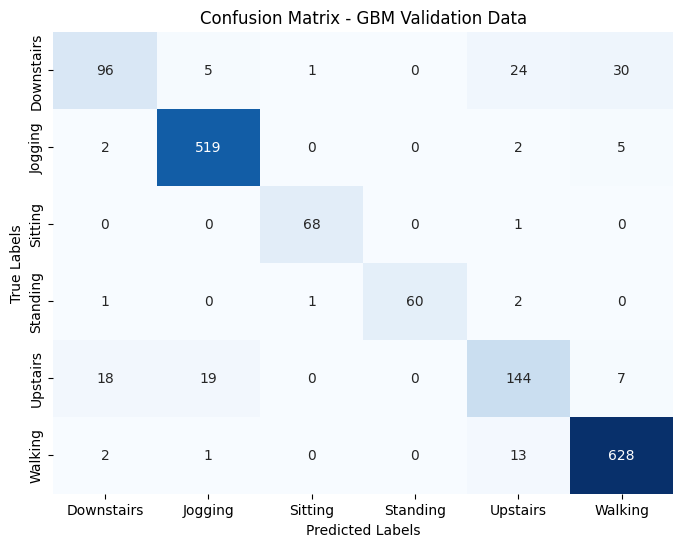

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Get unique labels
labels = sorted(y_test.unique())

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - GBM Validation Data")
plt.show()

In [29]:
# Convert column names to string type
X_kaggle.columns = X_kaggle.columns.astype(str)

In [ ]:
predictions_kaggle = gbm.predict(X_kaggle)

# Add predictions to the Kaggle data
df_metadata_kaggle['predicted_activity'] = predictions_kaggle

# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX.csv'

# Save predictions to a CSV file with specified columns
columns_to_save = ['user_snippet', 'predicted_activity']  # Adjusted column name
df_metadata_kaggle[columns_to_save].to_csv(predictions_file_path, index=False)

print("Predictions saved to:", predictions_file_path)


<ipython-input-22-02bad9ec3837>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_metadata_kaggle['predicted_activity'] = predictions_kaggle


Predictions saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX.csv


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50],  # Number of trees
    'learning_rate': [ 0.1],  # Learning rate
    'max_depth': [5],  # Maximum depth of trees
    'min_samples_leaf': [1]  # Minimum samples per leaf
}


In [20]:
# Initialize GBM classifier
gbm = GradientBoostingClassifier(random_state=42)


In [22]:
# Grid search cross-validation
grid_search = GridSearchCV(gbm, param_grid, cv=2, scoring='accuracy')

In [23]:
# Fit grid search
grid_search.fit(X_train, y_train)# Evaluate best model on test set
best_gbm = grid_search.best_estimator_
y_pred = best_gbm.predict(X_test)

In [24]:
# Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

  Downstairs       0.84      0.65      0.73       156
     Jogging       0.96      0.98      0.97       528
     Sitting       1.00      0.99      0.99        69
    Standing       0.97      0.97      0.97        64
    Upstairs       0.80      0.79      0.80       188
     Walking       0.94      0.98      0.96       644

    accuracy                           0.93      1649
   macro avg       0.92      0.89      0.90      1649
weighted avg       0.92      0.93      0.92      1649



In [30]:
predictions_kaggle = best_gbm.predict(X_kaggle)

# Add predictions to the Kaggle data
df_metadata_kaggle['predicted_activity'] = predictions_kaggle

# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX33.csv'

# Save predictions to a CSV file with specified columns
columns_to_save = ['user_snippet', 'predicted_activity']  # Adjusted column name
df_metadata_kaggle[columns_to_save].to_csv(predictions_file_path, index=False)

print("Predictions saved to:", predictions_file_path)

Predictions saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX33.csv


<ipython-input-30-3775be4857ce>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_metadata_kaggle['predicted_activity'] = predictions_kaggle


In [25]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[102   5   0   2  22  25]
 [  2 519   0   0   3   4]
 [  0   0  68   0   1   0]
 [  1   0   0  62   1   0]
 [ 13  17   0   0 149   9]
 [  4   1   0   0  10 629]]


In [ ]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)